[15:34:07] ERROR: Counts line too short: '' on line1084
[15:34:07] ERROR: moving to the beginning of the next molecule
C:\Users\79231\anaconda3\envs\irak4\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:365: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


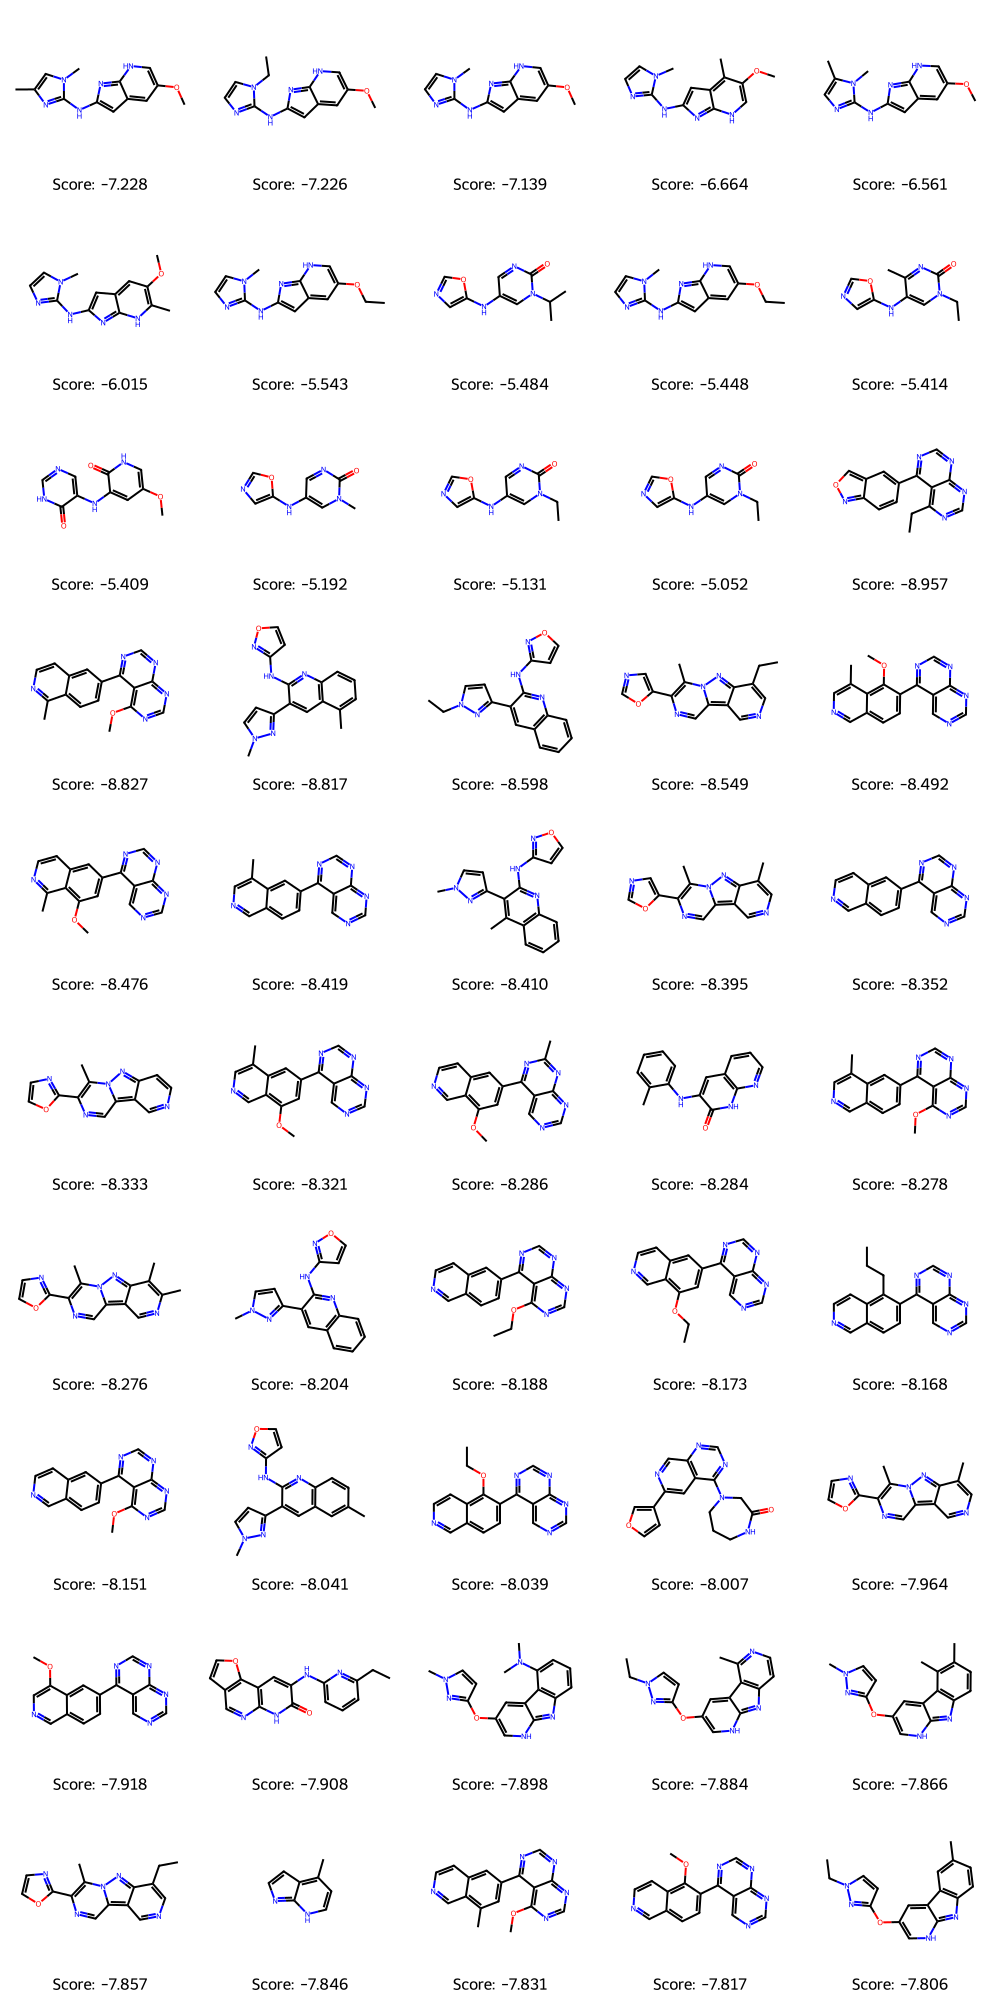

In [22]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

# Function to read molecules and their scores from an SDF file
def read_sdf(filename):
    suppl = Chem.SDMolSupplier(filename)
    molecules = []
    scores = []
    for mol in suppl:
        if mol is not None:
            # Compute 2D coordinates for better visualization
            AllChem.Compute2DCoords(mol) #также можешь перевести в smiles
            molecules.append(mol)
            scores.append(float(mol.GetProp('Score')))  # Assuming 'new_NBG_score' is a property in your SDF
    return molecules, scores

# Reading molecules and their NBG scores from a file
molecules, scores = read_sdf('scaffold_generation/results_all.sdf')

# Function to visualize molecules with NBG scores only
def visualize_molecules(molecules, scores):
    legends = [f"Score: {score:.3f}" for score in scores]
    img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(200, 200), legends=legends)
    return img

# Visualizing the molecules with NBG scores only
img = visualize_molecules(molecules, scores)
img


In [27]:
scores

[-7.227904796600342,
 -7.226192951202393,
 -7.138571262359619,
 -6.663896083831787,
 -6.5613532066345215,
 -6.0152764320373535,
 -5.542926788330078,
 -5.483748435974121,
 -5.44829797744751,
 -5.414051532745361,
 -5.4091339111328125,
 -5.192373752593994,
 -5.131301403045654,
 -5.0524468421936035,
 -8.956523895263672,
 -8.826952934265137,
 -8.816930770874023,
 -8.59836196899414,
 -8.54932975769043,
 -8.492473602294922,
 -8.475800514221191,
 -8.419341087341309,
 -8.410187721252441,
 -8.394512176513672,
 -8.351569175720215,
 -8.33322525024414,
 -8.321027755737305,
 -8.285628318786621,
 -8.283584594726562,
 -8.278196334838867,
 -8.276147842407227,
 -8.204431533813477,
 -8.188431739807129,
 -8.173384666442871,
 -8.167701721191406,
 -8.151276588439941,
 -8.041082382202148,
 -8.039474487304688,
 -8.006752967834473,
 -7.963857650756836,
 -7.918174743652344,
 -7.908210277557373,
 -7.897623538970947,
 -7.883994102478027,
 -7.866275310516357,
 -7.8565449714660645,
 -7.845649242401123,
 -7.83082199

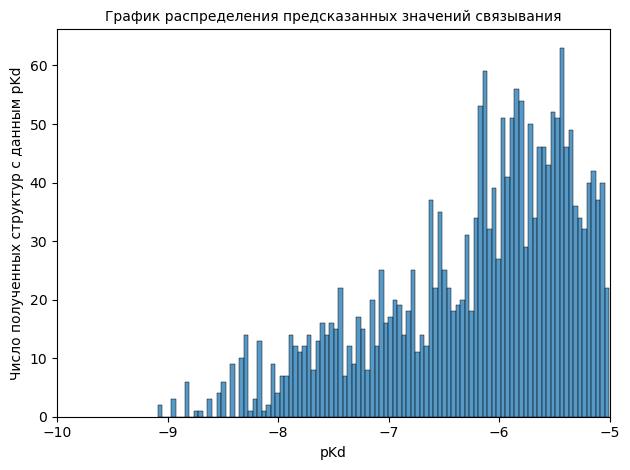

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(scores, bins=100)
plt.xlim(-10, -5)
plt.xlabel("pKd", fontsize=10)
plt.ylabel("Число полученных структур с данным pKd", fontsize=10)
plt.title("График распределения предсказанных значений связывания", fontsize=10)
plt.tight_layout()
plt.savefig("scaff_histplot_pKd.png", dpi=300, bbox_inches='tight')
plt.show()
